In [2]:
import numpy as np
import sklearn
import pandas as pd

# データの読み込み
california_data = sklearn.datasets.fetch_california_housing()

# データセットを学習用とテスト用に分ける（訓練8割，テスト2割）
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(california_data.data, california_data.target, test_size=0.2, random_state=2025, shuffle=True)

In [3]:
# 訓練データとテストデータセットのサイズの確認（入力変数について）
print('Train size: ', X_train.shape, '\nTest size: ', X_test.shape)

Train size:  (16512, 8) 
Test size:  (4128, 8)


In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [5]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=0),
    "SVR":  SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression(0.01)": Lasso(alpha=0.01),
    "Lasso Regression(0.1)": Lasso(alpha=0.1)
}

In [6]:
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores[name] = r2_score(y_test, pred)

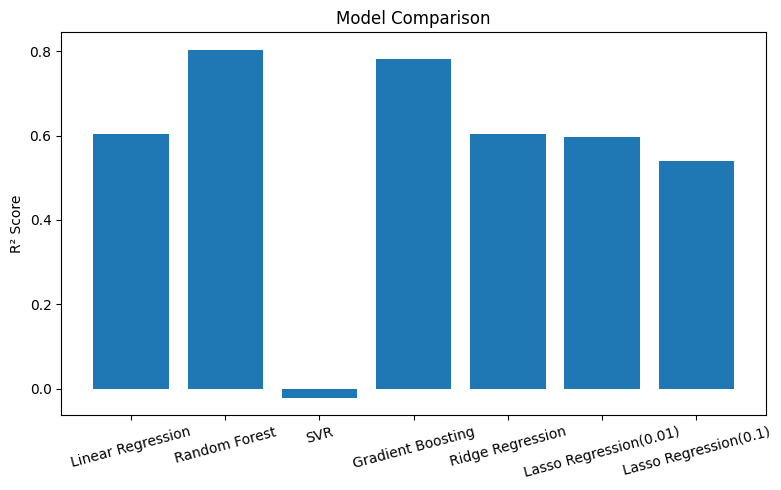

精度の高い順に並べたR²スコア
                        R² Score
Random Forest           0.803678
Gradient Boosting       0.782320
Linear Regression       0.602887
Ridge Regression        0.602876
Lasso Regression(0.01)  0.596120
Lasso Regression(0.1)   0.539792
SVR                    -0.021512


In [7]:
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values())
plt.ylabel("R² Score")
plt.title("Model Comparison")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# スコア確認
score_df = pd.DataFrame.from_dict(scores, orient='index', columns=['R² Score'])
score_df = score_df.sort_values(by='R² Score', ascending=False)
print("精度の高い順に並べたR²スコア")
print(score_df)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'svr__C': stats.loguniform(1e-1, 1e2),
    'svr__epsilon': stats.uniform(0.01, 0.5),
    'svr__gamma': stats.loguniform(1e-2, 1e1)
}

search = RandomizedSearchCV(make_pipeline(StandardScaler(), SVR()), param_dist, n_iter=20, cv=3, random_state=42)
search.fit(X_train, y_train)

,estimator,"Pipeline(step...svr', SVR())])"
,param_distributions,"{'svr__C': <scipy.stats....x7f4c5cf017f0>, 'svr__epsilon': <scipy.stats....x7f4c497cecc0>, 'svr__gamma': <scipy.stats....x7f4c497ce300>}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [74]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression(0.01)": Lasso(alpha=0.01),
    "Lasso Regression(0.1)": Lasso(alpha=0.1),
    "SVR-tuned": search.best_estimator_
}

In [75]:
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores[name] = r2_score(y_test, pred)

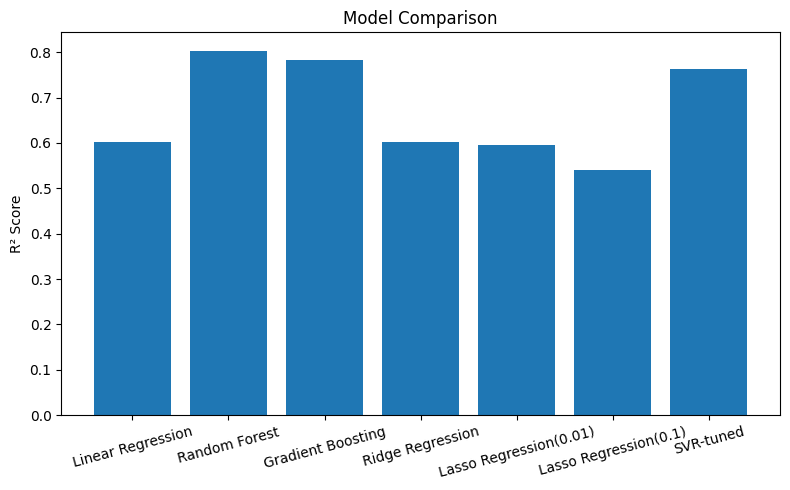

精度の高い順に並べたR²スコア
                        R² Score
Random Forest           0.803678
Gradient Boosting       0.782320
SVR-tuned               0.762475
Linear Regression       0.602887
Ridge Regression        0.602876
Lasso Regression(0.01)  0.596120
Lasso Regression(0.1)   0.539792


In [76]:
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values())
plt.ylabel("R² Score")
plt.title("Model Comparison")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# スコア確認
score_df = pd.DataFrame.from_dict(scores, orient='index', columns=['R² Score'])
score_df = score_df.sort_values(by='R² Score', ascending=False)
print("精度の高い順に並べたR²スコア")
print(score_df)

グラフを平均値と標準偏差（エラーバー）で作成

In [1]:
data = fetch_california_housing()
X = data.data
y = data.target


model_classes = {
    "Random Forest": RandomForestRegressor,
    "Gradient Boosting": GradientBoostingRegressor
}


results = {name: [] for name in model_classes}

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )
    for name, Model in model_classes.items():
        model = Model(random_state=seed)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        score = r2_score(y_test, pred)
        results[name].append(score)

means = {name: np.mean(scores) for name, scores in results.items()}
stds = {name: np.std(scores) for name, scores in results.items()}

plt.figure(figsize=(8, 6))
plt.bar(means.keys(), means.values(), yerr=stds.values(), capsize=10)
plt.ylabel("R² Score")
plt.title("Model Performance")
plt.tight_layout()
plt.show()


pd.DataFrame({
    "Mean R² Score": means,
    "Std Dev": stds
}).round(3)

NameError: name 'fetch_california_housing' is not defined